# <div align="center">一元: 残差分析(Residuals Analysis)</div>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

from scipy import stats

import warnings

warnings.filterwarnings('ignore')
    
%matplotlib inline

plt.style.use('seaborn')

# 调整子图之间的间隔
plt.tight_layout(pad = 3);
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

<Figure size 576x396 with 0 Axes>

样本数量:  50


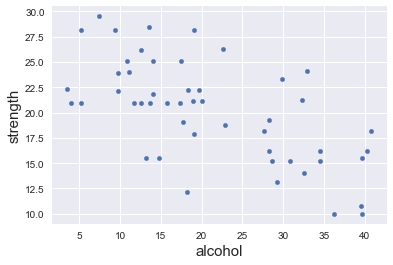

In [2]:
db = '/home/lidong/Datasets/'

alcoholarm_df = pd.read_csv(os.path.join(db, 'Statistics/alcoholarm.txt'), sep='\s')
alcoholarm_df.plot.scatter(x="alcohol", y="strength")
n = alcoholarm_df.index.size
print("样本数量: ", n)

model_result.resid(残差) type: <class 'pandas.core.series.Series'>


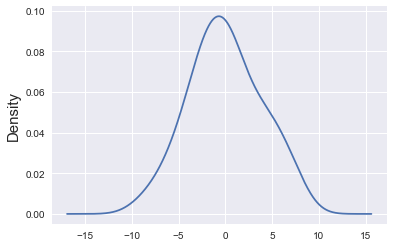

In [3]:
# 从拟合模型中取出残差数据
model_result = smf.ols("strength ~ alcohol", data=alcoholarm_df).fit()
print("model_result.resid(残差) type:", type(model_result.resid))
model_result.resid.plot.density()


In [4]:
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               strength   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     33.59
Date:                Mon, 24 Dec 2018   Prob (F-statistic):           5.14e-07
Time:                        22:47:08   Log-Likelihood:                -137.64
No. Observations:                  50   AIC:                             279.3
Df Residuals:                      48   BIC:                             283.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.3695      1.203     21.925      0.000      23.951      28.788
alcohol       -0.2959      0.051     -5.796      0.000      -0.399      -0.193
==============================================================================
Omnibus:                        0.297   Durbin-Watson:                   0.619
Prob(Omnibus):                  0.862   Jarque-Bera (JB):                0.481
Skew:                           0.042   Prob(JB):                        0.786
Kurtosis:                       2.527   Cond. No.                         51.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

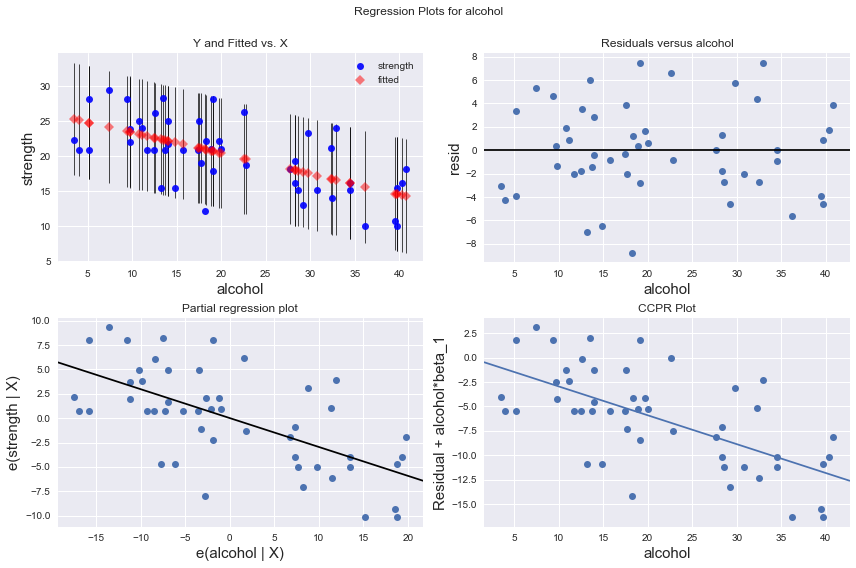

In [5]:
fig = plt.figure(figsize=(12,8))
# model_result.model.exog, exog_idx = 0 is constant '1'
sm.graphics.plot_regress_exog(model_result, exog_idx=1, fig = fig);

In [6]:
# 估计值
x = model_result.fittedvalues 
# 残差值
y = model_result.resid
# 残差平方和
sse = np.sum(np.power(model_result.resid, 2))
# 均方残差
mse = sse/(n - model_result.df_model - 1)
# 估计标准误差
s_e = np.sqrt(mse)
# 标准化残差 studentized residuals, why not equal != resid_studentized_internal
z_e1 = model_result.resid / s_e
z_e2 = model_result.get_influence().resid_studentized_internal
print(z_e1[:3])
print(z_e2[:3])

x1 = model_result.model.exog.T[1]

# absolute squared normalized residuals
y1 = np.sqrt(np.abs(z_e2))

# leverage, from statsmodels internals
model_leverage = model_result.get_influence().hat_matrix_diag
print("leverage: ",model_leverage[-3:])

# cook's distance, from statsmodels internals
model_cooks = model_result.get_influence().cooks_distance[0]
print("cook's distance: ", model_cooks[-3:])

0   -1.460897
1   -1.193573
2   -1.002329
dtype: float64
[-1.50701065 -1.2449952  -1.04477667]
leverage:  [0.02970148 0.02060992 0.05199981]
cook's distance:  [0.03815472 0.04007376 0.05456348]


Text(0.5,1,'Residuals vs Leverage')

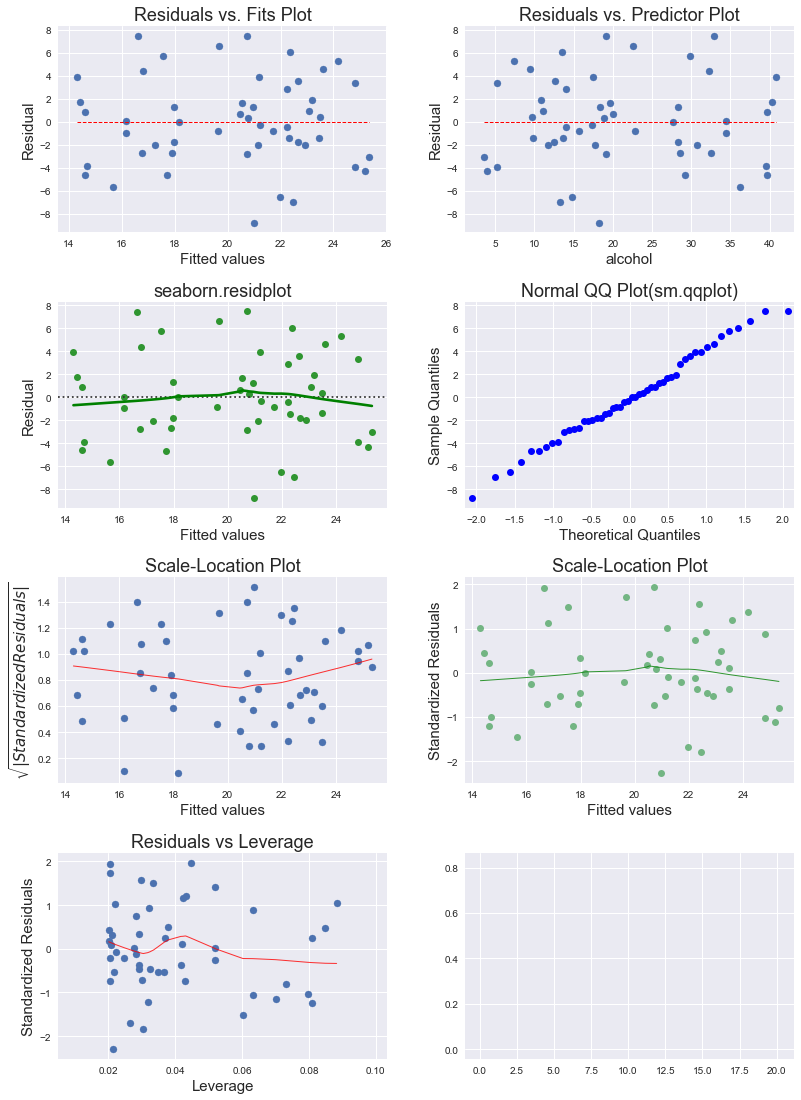

In [7]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16)) 
fig.tight_layout(pad=5)

axes[0, 0].hlines(y=0, xmin=np.min(x), xmax=np.max(x), colors='r', linestyle='dashed', lw=1)
axes[0, 0].scatter(x, y)
axes[0, 0].set_xlabel("Fitted values")
axes[0, 0].set_ylabel("Residual")
axes[0, 0].set_title("Residuals vs. Fits Plot")

axes[0, 1].hlines(y=0, xmin=np.min(x1), xmax=np.max(x1), colors='r', linestyle='dashed', lw=1)
axes[0, 1].scatter(x1, y)
axes[0, 1].set_xlabel("alcohol")
axes[0, 1].set_ylabel("Residual")
axes[0, 1].set_title("Residuals vs. Predictor Plot")

sns.residplot(x, y, lowess=True, color="g", ax=axes[1, 0])
axes[1, 0].set_xlabel("Fitted values")
axes[1, 0].set_ylabel("Residual")
axes[1, 0].set_title("seaborn.residplot")

sm.qqplot(data=y, dist=stats.norm, loc=0, scale=1, ax=axes[1, 1])
axes[1, 1].set_title("Normal QQ Plot(sm.qqplot)")

# LOWESS (locally weighted scatterplot smoothing)
sns.regplot(x, y1, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=axes[2, 0])
axes[2, 0].scatter(x, y1)
axes[2, 0].set_xlabel("Fitted values")
axes[2, 0].set_ylabel("$\sqrt{|Standardized Residuals|}$")
axes[2, 0].set_title("Scale-Location Plot")

sns.regplot(x, z_e1, 
            scatter=True, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'green', 'lw': 1, 'alpha': 0.8}, ax=axes[2, 1])
# axes[2, 1].scatter(x, z_e1)
axes[2, 1].set_xlabel("Fitted values")
axes[2, 1].set_ylabel("Standardized Residuals")
axes[2, 1].set_title("Scale-Location Plot")

# 没有太高的杠杆率
sns.regplot(model_leverage, z_e2, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=axes[3, 0])
axes[3, 0].scatter(model_leverage, z_e2) # z_e1
axes[3, 0].set_xlabel("Leverage")
axes[3, 0].set_ylabel("Standardized Residuals")
axes[3, 0].set_title("Residuals vs Leverage")